First, load in a test case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corr_g = np.genfromtxt("LIGHTCURVES/ASASSN-17jf_g.calib").T

print("Shape:")
print(corr_g.shape)
print("Zeroth array first and last:")
print(corr_g[0][0])
print(corr_g[0][-1])

raw_g = np.genfromtxt("ASASSN-17jf/CALIBRATION_STUDIES/USING_SMITH_STANDARD/MCMC_LIGHTCURVES/ASASSN-17jf_ucam_2019-09-28@02h52m_g.calib").T

Shape:
(3, 242)
Zeroth array first and last:
-0.19959858777405262
0.1877922972845339


And lets plot it, to see what kind of changes we're looking at

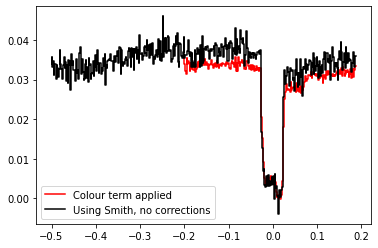

In [3]:
fig, ax = plt.subplots()
ax.step(corr_g[0], corr_g[1], color='red', label='Colour term applied')
ax.step(raw_g[0], raw_g[1], color='black', label='Using Smith, no corrections')
ax.legend()
plt.show()

Now, lets do that for all three bands. Each gets plotted on it's own graph

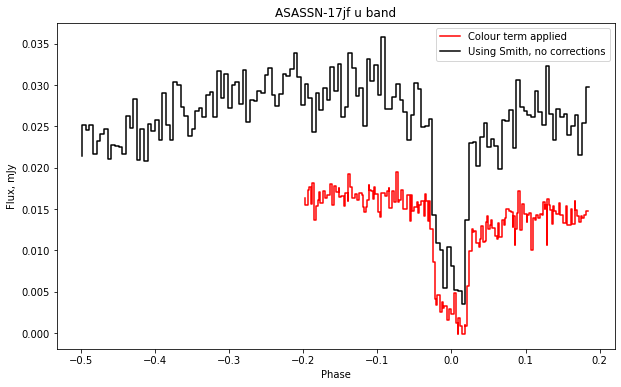

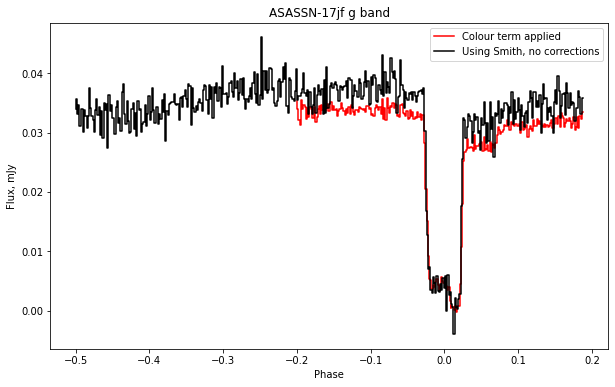

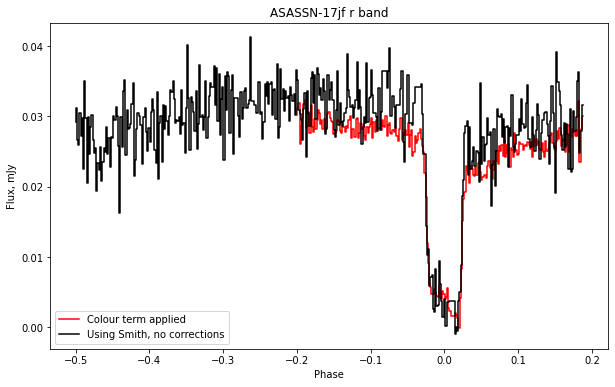

In [4]:
for band in ['u', 'g', 'r']:
    corr = np.genfromtxt("LIGHTCURVES/ASASSN-17jf_{}.calib".format(band)).T
    uncorr = np.genfromtxt("ASASSN-17jf/CALIBRATION_STUDIES/USING_SMITH_STANDARD/MCMC_LIGHTCURVES/ASASSN-17jf_ucam_2019-09-28@02h52m_{}.calib".format(band)).T
    fig, ax = plt.subplots(figsize=(10,6))
    ax.step(corr[0], corr[1], color='red', label='Colour term applied')
    ax.step(uncorr[0], uncorr[1], color='black', label='Using Smith, no corrections')
    ax.legend()
    ax.set_title("ASASSN-17jf {} band".format(band))
    ax.set_ylabel("Flux, mJy")
    ax.set_xlabel("Phase")
    plt.savefig("ASASSN-17jf_{}_uncorr_vs_corr.pdf".format(band))
    plt.show()
    

Alright, what WD fluxes does this correspond to? This chain file was run with just the fluxes varying, and all other things fixed.

In [5]:
chain = np.genfromtxt("MCMCFIT/chain_prod.txt", skip_header=1)
print(chain.mean(axis=0))

!head -1 MCMCFIT/chain_prod.txt

wdFlux_g = chain.mean(axis=0)[4]
wdFlux_r = chain.mean(axis=0)[8]
wdFlux_u = chain.mean(axis=0)[12]

[ 1.45000000e+01 -1.72500730e+01 -1.79174464e+01 -9.20516780e+00
  2.69097020e-02  2.43588077e-04  9.12825592e-04  7.31883976e-03
  2.04571339e-02  3.16245261e-04  2.17661482e-03  5.82474136e-03
  1.11652941e-02  2.87740928e-04  1.23748306e-03  3.12441755e-03
  2.18362688e+03]
walker_no ln_ampin_gp_core ln_ampout_gp_core ln_tau_gp_core wdFlux_g rsFlux_g dFlux_1 sFlux_1 wdFlux_r rsFlux_r dFlux_0 sFlux_0 wdFlux_u rsFlux_u dFlux_2 sFlux_2 ln_prob


In [6]:
def sdss_flux2mag(flx):
    '''Takes an flux in mJy and converts it to an SDSS magnitude'''
    alpha = 3631e3

    m = -2.5 * np.log10(flx)
    m += 2.5 * np.log10(alpha)

    return m

In [7]:
wdMag_g = sdss_flux2mag(wdFlux_g)

wdMag_r = sdss_flux2mag(wdFlux_r)

wdMag_u = sdss_flux2mag(wdFlux_u)

print("r:")
print(wdMag_r)
print("g:")
print(wdMag_g)
print("u:")
print(wdMag_u)

r:
20.622953653892775
g:
20.325293400560703
u:
21.280390208795254


In [8]:
wd_gr = wdMag_g - wdMag_r
wd_ug = wdMag_u - wdMag_g

print("ug colour: {:7.3f}".format(wd_ug))
print("gr colour: {:7.3f}".format(wd_gr))

ug colour:   0.955
gr colour:  -0.298


In [9]:
import pandas as pd

table_DA = pd.read_csv("tables/Bergeron_DA2.txt", delim_whitespace=True, skiprows=0, header=1)

In [10]:
print(table_DA.head())

     Teff  log_g   M/Mo    Mbol     BC           Age       U       B       V  \
0  1500.0    7.0  0.150  19.064  0.983  1.623000e+10  23.034  20.606  18.081   
1  1750.0    7.0  0.151  18.393  0.778  1.338000e+10  22.268  20.039  17.615   
2  2000.0    7.0  0.151  17.812  0.538  1.078000e+10  21.615  19.573  17.274   
3  2250.0    7.0  0.151  17.297  0.310  7.879000e+09  21.036  19.165  16.988   
4  2500.0    7.0  0.152  16.837  0.094  5.479000e+09  20.524  18.805  16.743   

        R  ...     IR1     IR2     IR3     IR4     u_s     g_s     r_s  \
0  17.823  ...  16.273  15.848  15.703  15.233  24.045  19.305  17.694   
1  17.167  ...  15.681  15.323  15.210  14.843  23.262  18.813  17.082   
2  16.667  ...  15.208  14.903  14.802  14.502  22.589  18.421  16.656   
3  16.260  ...  14.803  14.540  14.441  14.186  21.990  18.080  16.338   
4  15.929  ...  14.449  14.221  14.120  13.893  21.460  17.779  16.094   

      i_s     z_s     KG5  
0  19.779  19.447  18.780  
1  18.552  18.333 

NOTE!!! The table above I have modified so that it works better with my wdparams script!!! THE COLUMNS LABELLED u_s, g_s, etc ARE **SDSS** MAGNITUDES!!

In [11]:
table_DA['ug'] = table_DA['u_s'] - table_DA['g_s']
table_DA['gr'] = table_DA['g_s'] - table_DA['r_s']
print(table_DA.head())

     Teff  log_g   M/Mo    Mbol     BC           Age       U       B       V  \
0  1500.0    7.0  0.150  19.064  0.983  1.623000e+10  23.034  20.606  18.081   
1  1750.0    7.0  0.151  18.393  0.778  1.338000e+10  22.268  20.039  17.615   
2  2000.0    7.0  0.151  17.812  0.538  1.078000e+10  21.615  19.573  17.274   
3  2250.0    7.0  0.151  17.297  0.310  7.879000e+09  21.036  19.165  16.988   
4  2500.0    7.0  0.152  16.837  0.094  5.479000e+09  20.524  18.805  16.743   

        R  ...     IR3     IR4     u_s     g_s     r_s     i_s     z_s  \
0  17.823  ...  15.703  15.233  24.045  19.305  17.694  19.779  19.447   
1  17.167  ...  15.210  14.843  23.262  18.813  17.082  18.552  18.333   
2  16.667  ...  14.802  14.502  22.589  18.421  16.656  17.544  17.410   
3  16.260  ...  14.441  14.186  21.990  18.080  16.338  16.734  16.643   
4  15.929  ...  14.120  13.893  21.460  17.779  16.094  16.110  16.012   

      KG5     ug     gr  
0  18.780  4.740  1.611  
1  18.198  4.449  1.73

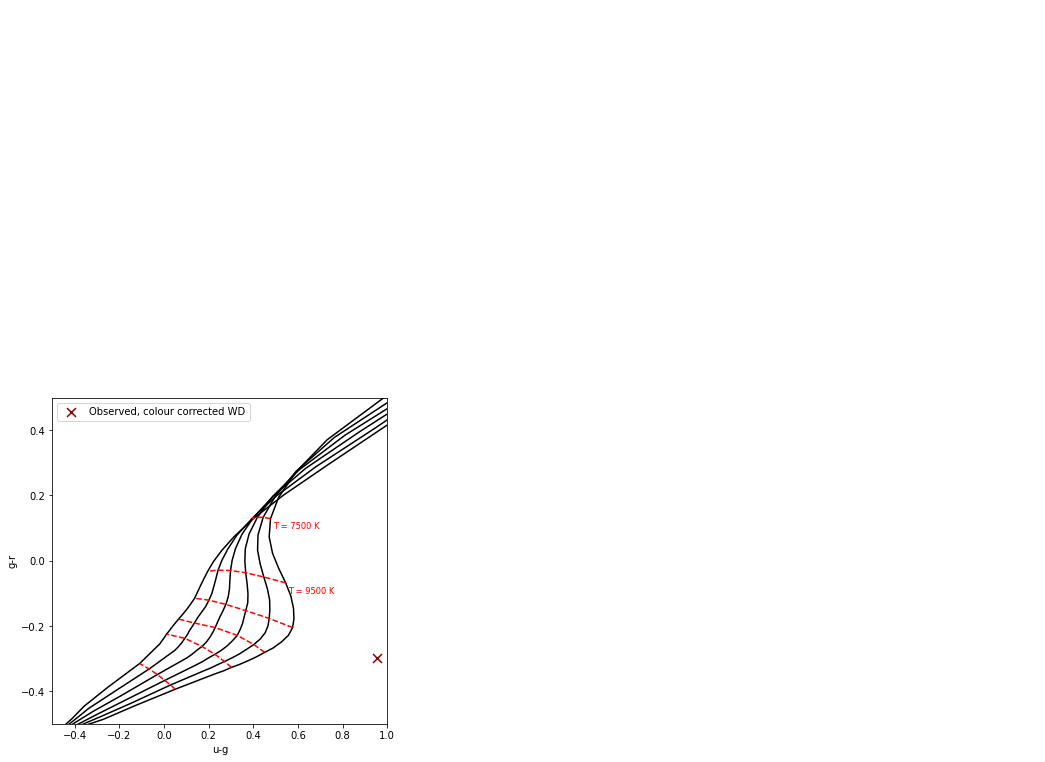

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

teffs = np.unique(table_DA['Teff'])
loggs = np.unique(table_DA['log_g'])
nteff = len(teffs)
nlogg = len(loggs)
# reshape colours onto 2D grid of (logg, teff)
ug = np.array(table_DA['ug']).reshape((nlogg, nteff))
gr = np.array(table_DA['gr']).reshape((nlogg, nteff))

# Bergeron cooling tracks and isogravity contours
for a in range(nlogg):
    ax.plot(ug[a, :], gr[a, :], 'k-')
for a in range(0, nteff, 4):
    ax.plot(ug[:, a], gr[:, a], 'r--')

# Observed color
ax.scatter(
    x=wd_ug, y=wd_gr,
    color='darkred', marker='x', s=80,
    label='Observed, colour corrected WD'
)

# annotate for teff
xa = ug[0, 4] + 0.03
ya = gr[0, 4]
val = teffs[4]
t = ax.annotate(
    'T = %d K' % val, xy=(xa, ya), color='r',
    horizontalalignment='left',
    verticalalignment='center', size='small'
)
t.set_rotation(0.0)

xa = ug[0, 8] + 0.03
ya = gr[0, 8]
val = teffs[8]
t = ax.annotate(
    'T = %d K' % val, xy=(xa, ya), color='r',
    horizontalalignment='left',
    verticalalignment='center', size='small'
)
t.set_rotation(0.0)

xa = ug[0, 20] + 0.01
ya = gr[0, 20] - 0.01
val = teffs[20]
t = ax.annotate(
    'T = %d K' % val, xy=(xa, ya), color='r',
    horizontalalignment='left',
    verticalalignment='top', size='small'
)
t.set_rotation(0.0)

xa = ug[0, 24] + 0.01
ya = gr[0, 24] - 0.01
val = teffs[24]
t = ax.annotate(
    'T = %d K' % val, xy=(xa, ya), color='r',
    horizontalalignment='left',
    verticalalignment='top', size='small'
)
t.set_rotation(0.0)

ax.set_xlabel('u-g')
ax.set_ylabel('g-r')
ax.set_xlim([-0.5, 1])
ax.set_ylim([-0.5, 0.5])
ax.legend()

plt.show()